In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Пример данных (матрица X размером n x p)
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2, 1.6],
              [1, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

X

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

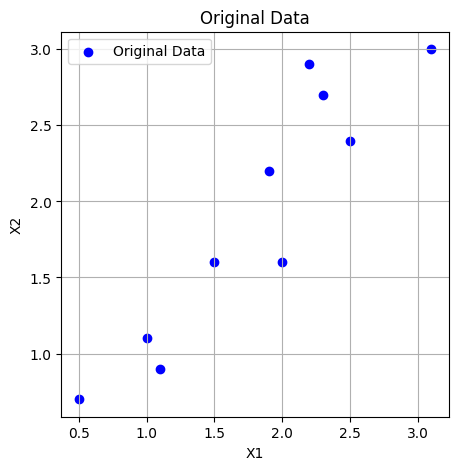

In [2]:
# График исходных данных
plt.figure(figsize=(5, 5))

# plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)

In [3]:
# Центрирование данных
X_centered = X - np.mean(X, axis=0)

X_centered

array([[ 0.69,  0.49],
       [-1.31, -1.21],
       [ 0.39,  0.99],
       [ 0.09,  0.29],
       [ 1.29,  1.09],
       [ 0.49,  0.79],
       [ 0.19, -0.31],
       [-0.81, -0.81],
       [-0.31, -0.31],
       [-0.71, -1.01]])

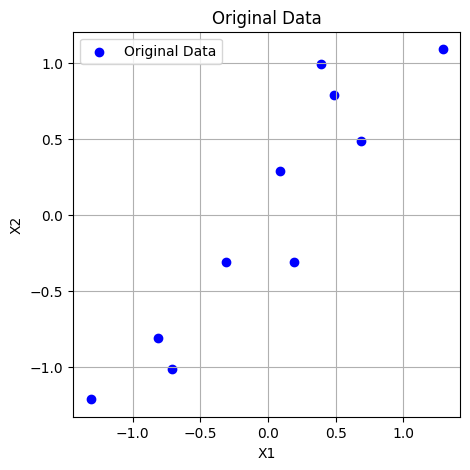

In [4]:
# График исходных данных
plt.figure(figsize=(5, 5))

# plt.subplot(1, 2, 1)
plt.scatter(X_centered[:, 0], X_centered[:, 1], color='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)

In [5]:

# Ковариационная матрица
cov_matrix = np.cov(X_centered, rowvar=False)
cov_matrix

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [6]:

# Собственные значения и собственные векторы
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)



In [7]:
eigenvalues

array([0.0490834 , 1.28402771])

In [8]:
eigenvectors

array([[-0.73517866,  0.6778734 ],
       [ 0.6778734 ,  0.73517866]])

In [9]:

# Сортировка собственных значений и векторов
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]


In [10]:
sorted_eigenvalues, sorted_eigenvectors

(array([1.28402771, 0.0490834 ]),
 array([[ 0.6778734 , -0.73517866],
        [ 0.73517866,  0.6778734 ]]))

In [11]:

# Проекция данных на главные компоненты
X_pca = np.dot(X_centered, sorted_eigenvectors)
X_pca

array([[ 0.82797019, -0.17511531],
       [-1.77758033,  0.14285723],
       [ 0.99219749,  0.38437499],
       [ 0.27421042,  0.13041721],
       [ 1.67580142, -0.20949846],
       [ 0.9129491 ,  0.17528244],
       [-0.09910944, -0.3498247 ],
       [-1.14457216,  0.04641726],
       [-0.43804614,  0.01776463],
       [-1.22382056, -0.16267529]])

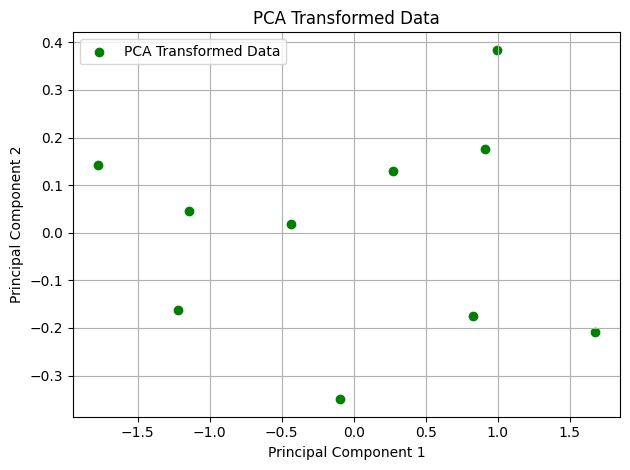

In [12]:
# График данных после PCA
# plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='green', label='PCA Transformed Data')
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

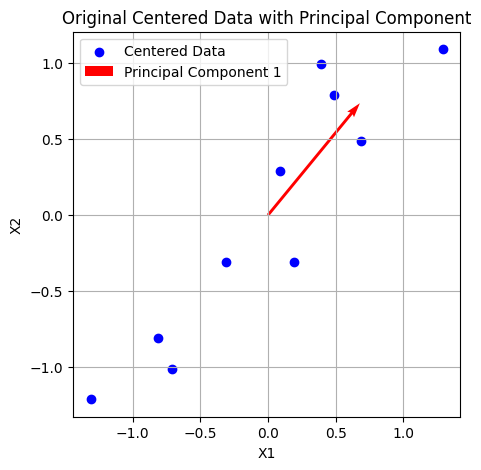

In [13]:
# График исходных данных с главным компонентом
plt.figure(figsize=(5, 5))
plt.scatter(X_centered[:, 0], X_centered[:, 1], color='blue', label='Centered Data')
plt.title('Original Centered Data with Principal Component')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)

# Добавление главного компонента
origin = np.mean(X_centered, axis=0)  # Центр данных
pc1 = sorted_eigenvectors[:, 0]  # Первый главный компонент

plt.quiver(origin[0], origin[1], pc1[0], pc1[1],
           angles='xy', scale_units='xy', scale=1, color='red', label='Principal Component 1')

plt.legend()
plt.show()

In [14]:
# Применение SVD
U, Sigma, VT = np.linalg.svd(X_centered)

# Главные компоненты
principal_components = VT.T

# Проекция данных на главные компоненты
X_pca_svd = np.dot(X_centered, -VT.T)
X_pca_svd

array([[ 0.82797019, -0.17511531],
       [-1.77758033,  0.14285723],
       [ 0.99219749,  0.38437499],
       [ 0.27421042,  0.13041721],
       [ 1.67580142, -0.20949846],
       [ 0.9129491 ,  0.17528244],
       [-0.09910944, -0.3498247 ],
       [-1.14457216,  0.04641726],
       [-0.43804614,  0.01776463],
       [-1.22382056, -0.16267529]])

связь сингулярных значений и собственных

In [15]:
Sigma

array([3.3994484 , 0.66464321])

In [16]:
eigenvalues

array([0.0490834 , 1.28402771])

In [17]:
Sigma[1]**(2)/9, Sigma[0]**(2)/9

(0.04908339893832733, 1.2840277121727839)

Главные компоненты PCA соответствуют правым сингулярным вектором
 из SVD матрицы данных

In [18]:
VT

array([[-0.6778734 , -0.73517866],
       [ 0.73517866, -0.6778734 ]])

In [19]:
eigenvectors

array([[-0.73517866,  0.6778734 ],
       [ 0.6778734 ,  0.73517866]])

In [20]:
X_pca

array([[ 0.82797019, -0.17511531],
       [-1.77758033,  0.14285723],
       [ 0.99219749,  0.38437499],
       [ 0.27421042,  0.13041721],
       [ 1.67580142, -0.20949846],
       [ 0.9129491 ,  0.17528244],
       [-0.09910944, -0.3498247 ],
       [-1.14457216,  0.04641726],
       [-0.43804614,  0.01776463],
       [-1.22382056, -0.16267529]])

In [21]:
X_pca_svd

array([[ 0.82797019, -0.17511531],
       [-1.77758033,  0.14285723],
       [ 0.99219749,  0.38437499],
       [ 0.27421042,  0.13041721],
       [ 1.67580142, -0.20949846],
       [ 0.9129491 ,  0.17528244],
       [-0.09910944, -0.3498247 ],
       [-1.14457216,  0.04641726],
       [-0.43804614,  0.01776463],
       [-1.22382056, -0.16267529]])

# T-SNE

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

При низком значении perplexity алгоритм больше фокусируется на локальной структуре (т.е. ближних соседях каждой точки), при высоком значении - на глобальной структуре (т.е. более отдалённых отношениях между точками).

In [23]:

# Генерация данных с четко выраженными кластерами
X, y = make_blobs(n_samples=300, centers=5, cluster_std=1.5, random_state=42)

In [24]:
# T-SNE с маленьким perplexity
tsne_perplexity_5 = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)
X_embedded_5 = tsne_perplexity_5.fit_transform(X)

# T-SNE с большим perplexity для сравнения
tsne_perplexity_250 = TSNE(n_components=2, perplexity=250, n_iter=1000, random_state=42)
X_embedded_250 = tsne_perplexity_250.fit_transform(X)


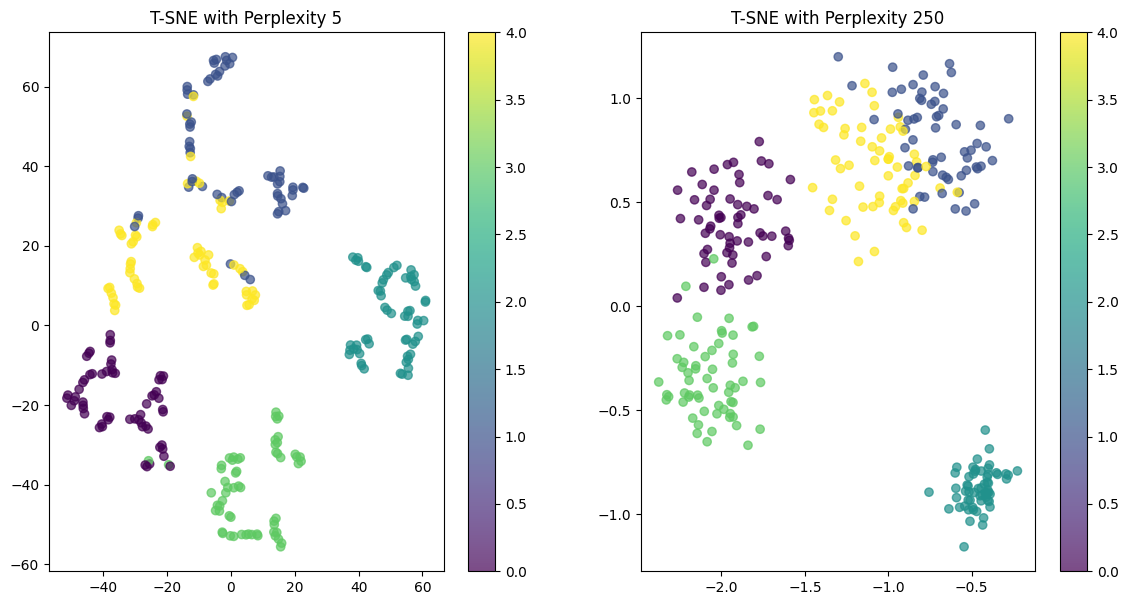

In [25]:

# Визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Маленькое perplexity
sc1 = axes[0].scatter(X_embedded_5[:, 0], X_embedded_5[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[0].set_title('T-SNE with Perplexity 5')
fig.colorbar(sc1, ax=axes[0])

# Большое perplexity
sc2 = axes[1].scatter(X_embedded_250[:, 0], X_embedded_250[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[1].set_title('T-SNE with Perplexity 250')
fig.colorbar(sc2, ax=axes[1])

plt.show()


In [26]:
# Генерация данных с несколькими кластерами
X, y = make_blobs(n_samples=300, centers=5, cluster_std=9.5, random_state=42)


In [27]:

# T-SNE с маленьким perplexity для сравнения
tsne_perplexity_5 = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)
X_embedded_5 = tsne_perplexity_5.fit_transform(X)

# T-SNE с большим perplexity
tsne_perplexity_250 = TSNE(n_components=2, perplexity=250, n_iter=1000, random_state=42)
X_embedded_250 = tsne_perplexity_250.fit_transform(X)


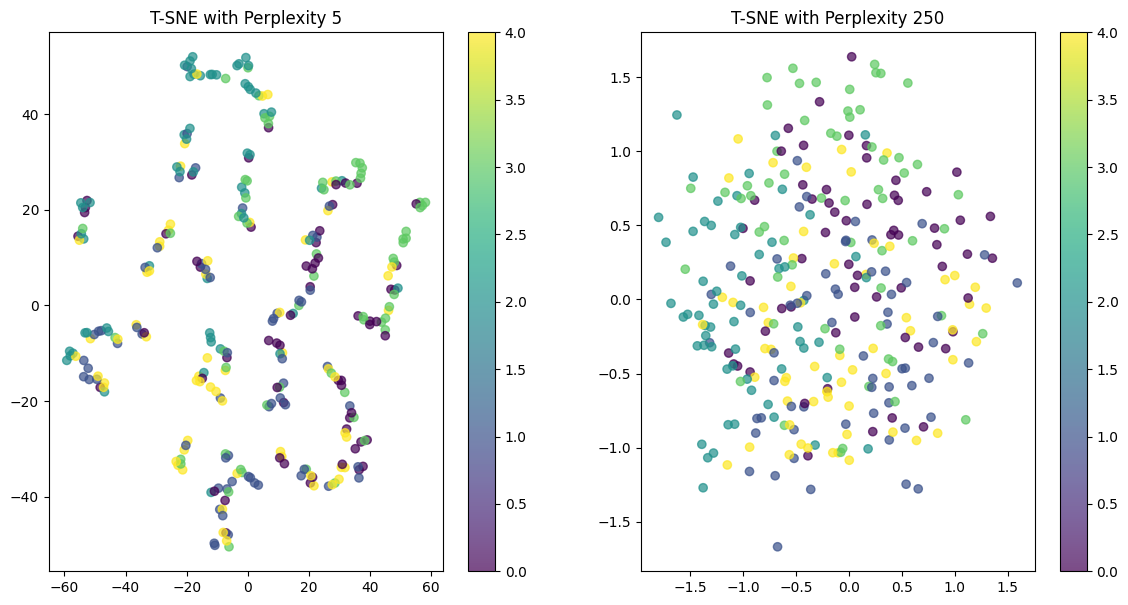

In [28]:

# Визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Маленькое perplexity
sc1 = axes[0].scatter(X_embedded_5[:, 0], X_embedded_5[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[0].set_title('T-SNE with Perplexity 5')
fig.colorbar(sc1, ax=axes[0])

# Большое perplexity
sc2 = axes[1].scatter(X_embedded_250[:, 0], X_embedded_250[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[1].set_title('T-SNE with Perplexity 250')
fig.colorbar(sc2, ax=axes[1])

plt.show()


# Сравним PCA и T-SNE

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits


In [30]:

# Загрузка данных
digits = load_digits()
X = digits.data
y = digits.target


In [31]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [32]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [33]:
X.shape

(1797, 64)

In [34]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [35]:
y[0]

0

In [36]:

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



In [37]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)



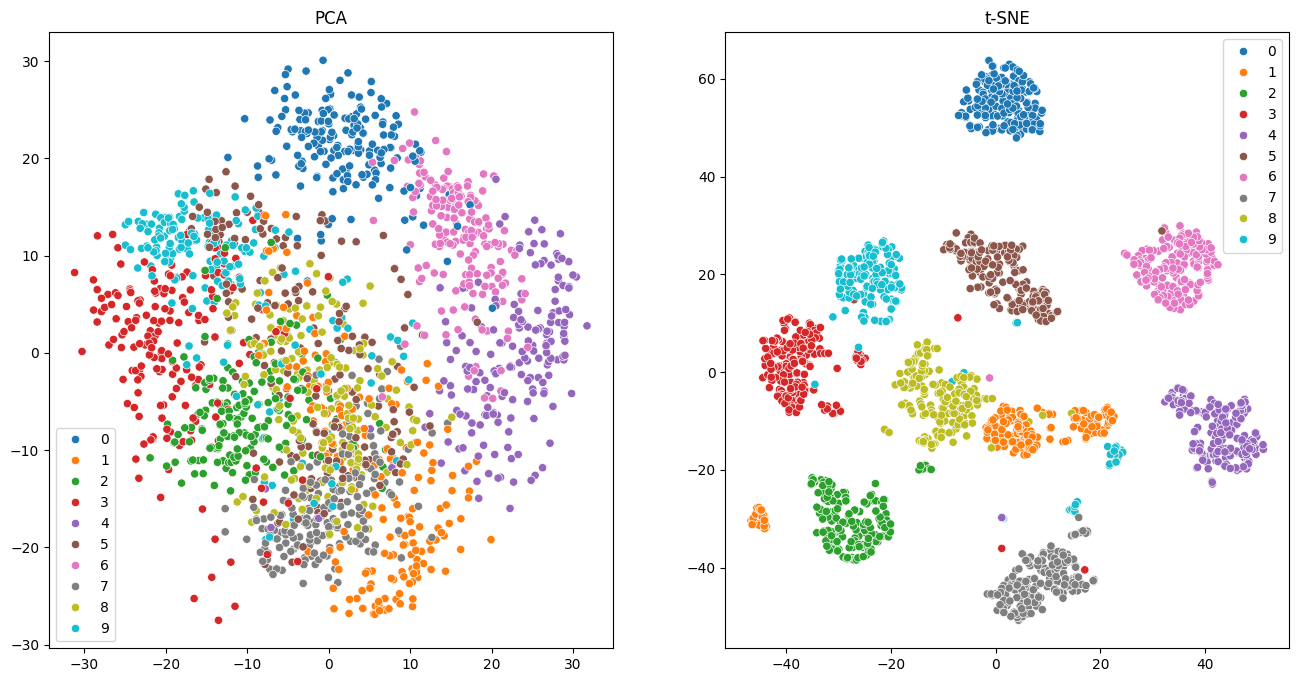

In [38]:
# Визуализация
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="tab10", ax=ax[0])
ax[0].set_title("PCA")

# t-SNE
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="tab10", ax=ax[1])
ax[1].set_title("t-SNE")

plt.show()


# UMAP

In [39]:
pip install umap-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.1 MB/s eta 0:00:00


In [40]:
from umap import UMAP

In [41]:
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


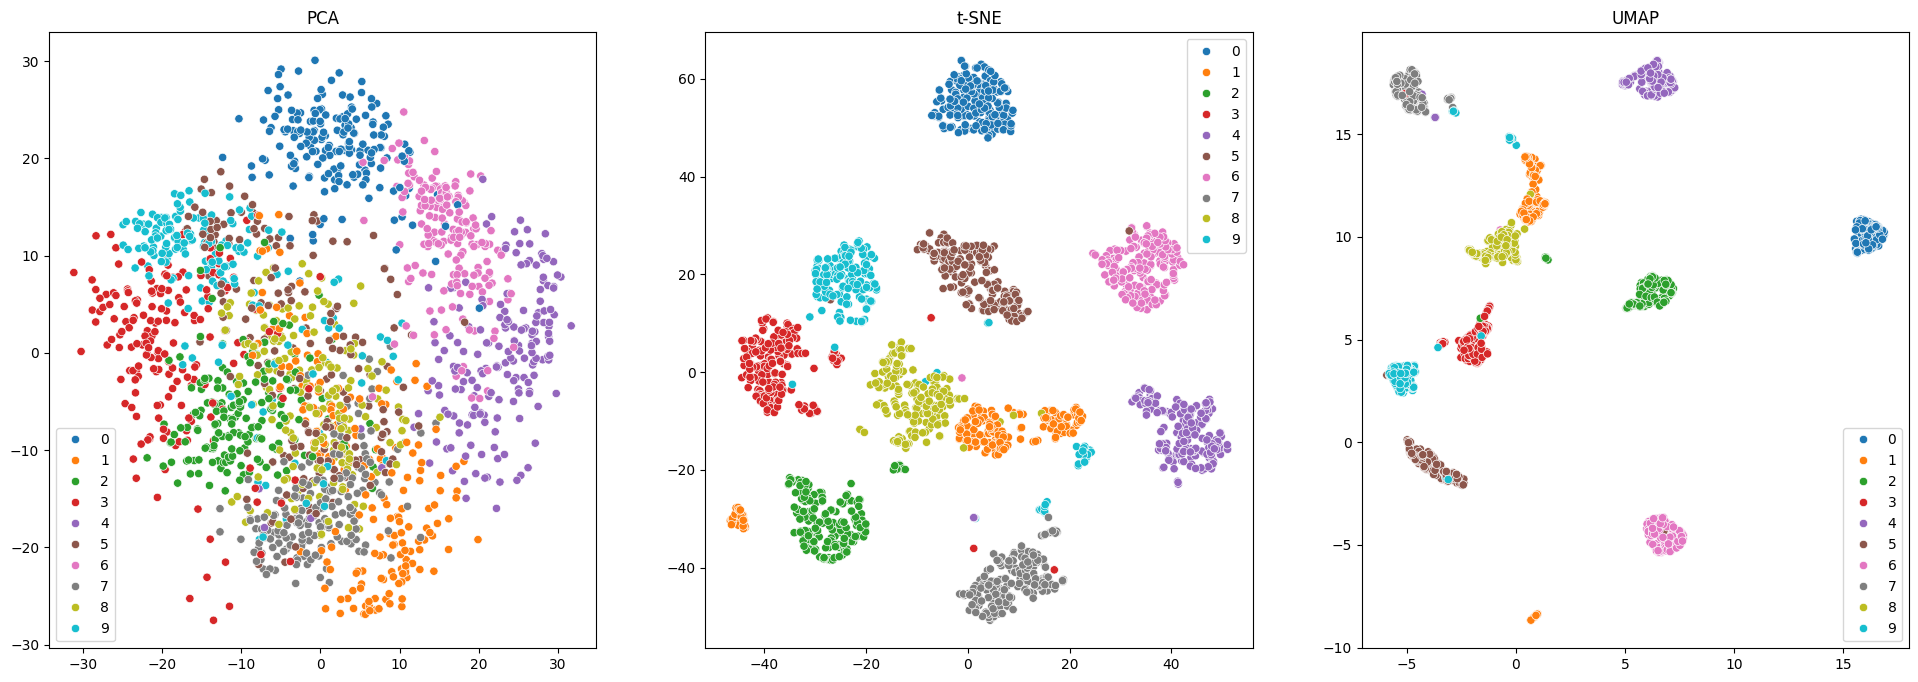

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(24, 8))

# PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="tab10", ax=ax[0])
ax[0].set_title("PCA")

# t-SNE
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="tab10", ax=ax[1])
ax[1].set_title("t-SNE")

# UMAP
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette="tab10", ax=ax[2])
ax[2].set_title("UMAP")

plt.show()